# Homework 0

**Name:** Oscar Eduardo Arámbula Vega

**e-mail:** oscar.arambula4388@alumnos.udg.mx

# MODULES

In [1]:
# Load modules
from typing import Callable
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

# Theory on the Gradient Descent algorithm

The eason function is: $f(x,y) = -cos(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2}$

The gradient of the Eason function is: $\nabla f(x,y) = \begin{bmatrix} sin(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2} + 2(x - \pi)cos(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2} \\ cos(x)sin(y)e^{-(x-\pi)^2-(y-\pi)^2} + 2(y -\pi)cos(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2} \end{bmatrix}$

I extracted the gradient from the following [source](https://www.mdrk.io/interesting-functions-to-optimize/).

This could be simplified extracting common factors to: $\nabla f(x,y) = \begin{bmatrix} cos(y)e^{-(x-\pi)^2-(y-\pi)^2}(sin(x)+ 2(x - \pi)cos(x)) \\ cos(x)e^{-(x-\pi)^2-(y-\pi)^2}(sin(y)+ 2(x - \pi)cos(y)) \end{bmatrix}$



In [8]:
# Function to be optimized
def easom[T: npt.NDArray[float|int]](x: T, y: T) -> T:
    return -np.cos(x) * np.cos(y) * np.exp(- (x - np.pi) ** 2 - (y - np.pi) ** 2)

def easom_gradient(x: float, y: float) -> npt.NDArray[float]:
    grad_x = np.cos(y) * np.exp(- (x - np.pi) ** 2 - (y - np.pi) ** 2) * (np.sin(x) + 2 * (x - np.pi) * np.cos(x))
    grad_y = np.cos(x) * np.exp(- (x - np.pi) ** 2 - (y - np.pi) ** 2) * (np.sin(y) + 2 * (y - np.pi) * np.cos(y))
    return np.array([grad_x, grad_y])

In [61]:
# Run gradient descent algorithm
def gradient_descent(
    gradient: Callable[[float, float], npt.NDArray[float]],
    start: npt.NDArray[float],
    learning_rate: float,
    max_iterations: int = 1000,
    tolerance: float = 1e-06,
) -> npt.NDArray[npt.NDArray[float]]:
    steps = [start]

    current = start
    for i in range(max_iterations):
        diff = - gradient(*current) * learning_rate

        if np.all(np.abs(diff) <= tolerance):
            break

        current = current + diff
        steps.append(current)

    return np.array(steps)

path = gradient_descent(
    gradient=easom_gradient,
    start=np.array([1.4, 4.3]), # [1.4, 4.3] is a good starting point
    learning_rate=0.1,
    max_iterations=1000,
    tolerance=1e-06,
)

# Print the final point and number of steps
print(f"Final point: {path[-1]}")
print(f"Number of steps: {len(path)}")

Final point: [3.14158945 3.14159562]
Number of steps: 978


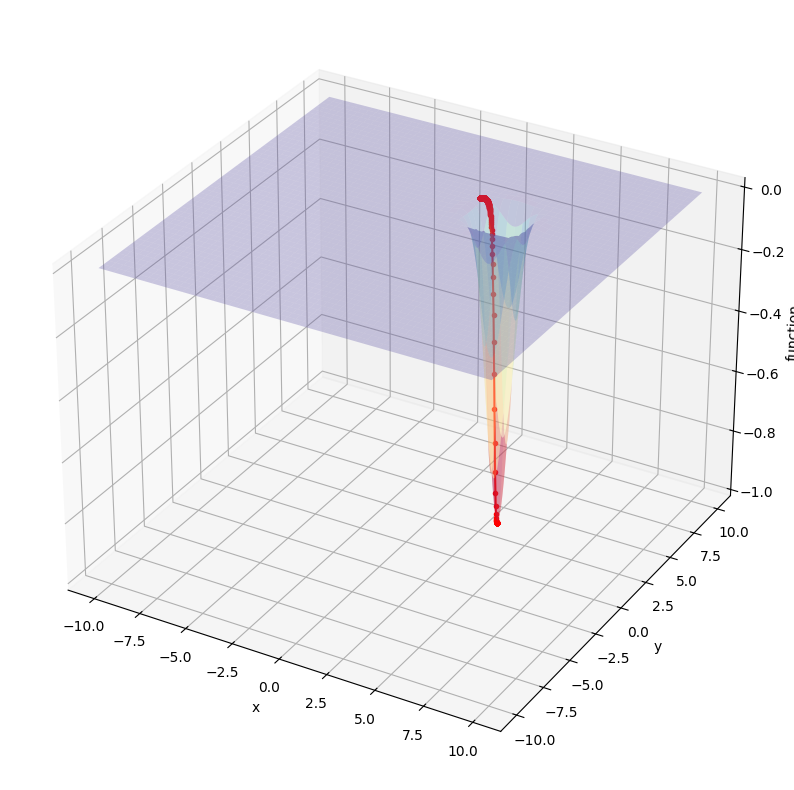

In [62]:
# Define a meshgrid for plotting the function
x_range = np.arange(-10, 10, 0.05)
y_range = np.arange(-10, 10, 0.05)

X, Y = np.meshgrid(x_range, y_range)
Z = easom(X,Y)

# Plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='Spectral', alpha=0.3)

# ax.scatter(0,0,0, c='r', marker='o')
ax.plot(path[:, 0], path[:, 1], easom(path[:, 0], path[:, 1]), c='r', marker='o', markersize=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('function')
plt.show()